In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
x_train = pd.read_csv('X_train_NHkHMNU.csv')
y_train = pd.read_csv('y_train_ZAN5mwg.csv')
x_test =  pd.read_csv('X_test_final.csv')

pd.set_option('display.max_columns', None)
from sklearn.impute import KNNImputer



In [2]:
def preprocessing(dataset):

    dataset = pd.get_dummies(dataset, columns=['COUNTRY'])
    placeholder_value = -9999
    dataset_filled = dataset.fillna(placeholder_value)
    columns_to_impute = dataset_filled.columns
    imputer = KNNImputer(n_neighbors=5)
    dataset_filled.replace(placeholder_value, float('nan'), inplace=True)
    return pd.DataFrame(imputer.fit_transform(dataset_filled), columns=columns_to_impute)

x_train_imputed = preprocessing(x_train)
x_test_imputed = preprocessing(x_test)




In [3]:
x_test_imputed

,ID,DAY_ID,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,DE_COAL,FR_COAL,DE_HYDRO,FR_HYDRO,DE_NUCLEAR,FR_NUCLEAR,DE_SOLAR,FR_SOLAR,DE_WINDPOW,FR_WINDPOW,DE_LIGNITE,DE_RESIDUAL_LOAD,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,COUNTRY_DE,COUNTRY_FR
0,1115.0,241.0,0.340083,-0.433604,-0.423521,0.423521,0.165333,0.519419,-0.165333,-0.519419,1.524963,0.423845,2.137016,0.478424,0.776246,-0.371184,0.069696,0.057826,0.005100,-0.276211,-1.145765,-0.827504,0.778229,1.246268,-0.222525,-0.513180,-0.182048,-0.982546,-0.876632,0.880491,0.692242,0.569419,-0.029697,-0.929256,0.0,1.0
1,1202.0,1214.0,0.803209,0.780411,0.601610,-0.601610,0.342802,0.555367,-0.342802,-0.555367,1.064102,1.807256,0.089534,-0.792111,1.549245,0.107882,0.826372,0.746628,0.585133,1.034943,-0.211726,-0.698175,0.727622,0.553214,0.857739,-0.340595,-0.301094,-0.759816,-1.221443,-0.616617,-0.737496,0.251251,0.753646,0.664086,0.0,1.0
2,1194.0,1047.0,0.795540,0.721954,1.179158,-1.179158,1.620928,0.666901,-1.620928,-0.666901,0.128004,-0.043300,-0.829546,-0.785153,0.419503,0.014481,0.444562,1.000065,-0.427068,-0.011782,2.373643,1.248551,-1.440563,-1.398675,0.447967,0.796475,-0.367248,0.376055,-0.483363,0.865138,0.120079,-1.485642,-0.326450,-0.349747,0.0,1.0
3,1084.0,1139.0,0.172555,-0.723427,-0.044539,0.044539,1.054112,-0.205276,-1.054112,0.205276,1.046069,-0.174150,0.888429,-0.283794,1.864139,0.114829,0.616779,-0.779813,0.727103,1.018475,-1.146251,-0.999996,0.792428,0.905864,-0.561295,-0.542606,-0.013291,-0.791119,-0.894309,0.239153,0.457457,-0.746863,2.262654,0.642069,0.0,1.0
4,1135.0,842.0,0.949714,0.420236,0.617391,-0.617391,0.608561,-0.240856,-0.608561,0.240856,1.376753,1.413967,1.703635,-0.239676,0.815007,0.179202,0.702691,0.169555,-0.873472,-0.538052,-0.274033,-0.215250,0.923490,1.167985,0.503567,-0.230291,-0.609203,-0.744986,-1.196282,0.176557,0.312557,-2.219626,-0.509272,-0.488341,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,879.0,213.0,0.267684,-0.901332,0.749769,-0.749769,1.198565,-1.614458,-1.198565,1.614458,-0.601501,0.012450,-0.641398,-0.761764,-0.353839,-1.455799,-1.850824,-2.141923,0.264836,1.665916,1.615553,0.264907,-0.579645,-1.336085,-1.057186,1.591562,-0.284628,2.272121,1.647899,-0.838634,-0.463684,-1.071829,0.720641,-1.842072,1.0,0.0
650,673.0,943.0,1.389207,1.466549,0.661778,-0.661778,0.610986,-1.934012,-0.610986,1.934012,0.993839,1.962333,0.989344,-0.296166,-0.382996,0.620018,-0.003675,-0.080128,-1.260468,-0.794358,0.658971,1.674181,0.544348,0.536046,1.055349,0.155454,-0.168436,1.290495,2.199105,-0.329098,-1.172309,-1.290355,-0.897009,-0.925825,1.0,0.0
651,1641.0,261.0,1.377650,1.781671,0.557006,-0.557006,-0.326698,-1.462676,0.326698,1.462676,3.215415,2.157089,1.733252,0.174214,1.678564,2.381035,0.217880,0.451832,-1.409777,-0.842509,-0.863431,-0.113392,0.964522,2.203129,1.824478,-0.825759,-0.266881,-1.247165,-0.666308,-0.807636,-1.260777,0.931572,0.151169,0.474347,0.0,1.0
652,712.0,1082.0,1.232202,1.971074,0.537247,-0.537247,-1.109420,-1.464287,1.109420,1.464287,2.534455,2.202872,1.310571,0.683835,-0.094857,1.802379,-1.833913,0.819116,-1.028322,0.461176,-0.752465,-0.564437,0.284702,1.486907,1.964292,-0.145241,-0.358861,0.195383,-0.103433,1.352906,-0.485161,0.995363,-0.152287,2.067306,1.0,0.0


In [4]:
# Calculating the number of duplicate entries in the "DAY_ID" column
duplicate_day_ids = x_train['DAY_ID'].duplicated().sum()

duplicate_day_ids


643

In [5]:
x_train[x_train["DAY_ID"] == 742]

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,DE_COAL,FR_COAL,DE_HYDRO,FR_HYDRO,DE_NUCLEAR,FR_NUCLEAR,DE_SOLAR,FR_SOLAR,DE_WINDPOW,FR_WINDPOW,DE_LIGNITE,DE_RESIDUAL_LOAD,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
154,1468,742,FR,-0.406129,-0.856255,-2.070478,2.070478,-1.571685,1.383268,1.571685,-1.383268,0.27312,-1.271399,-1.402488,-0.775009,-0.044948,-0.110575,-0.097032,0.047123,1.419338,0.847484,-0.554563,-0.401391,-1.381176,-0.231446,-0.804253,-0.141934,-0.147972,-0.854689,-0.677703,0.798849,1.037818,1.486188,0.143194,-0.018164
1306,252,742,DE,-0.406129,-0.856255,-2.070478,2.070478,-1.571685,1.383268,1.571685,-1.383268,0.27312,-1.271399,-1.402488,-0.775009,-0.044948,-0.110575,-0.097032,0.047123,1.419338,0.847484,-0.554563,-0.401391,-1.381176,-0.231446,-0.804253,-0.141934,-0.147972,-0.854689,-0.677703,0.798849,1.037818,1.486188,0.143194,-0.018164


In [6]:
x_train_imputed.sort_values('DAY_ID', inplace = True)
x_train_imputed.set_index('ID', inplace = True)
x_test_imputed.sort_values('DAY_ID', inplace = True)
x_test_imputed.set_index('ID', inplace = True)
y_train.set_index('ID', inplace = True)

In [9]:
x_train_imputed.to_csv("x_train_imputed.csv", index=False)

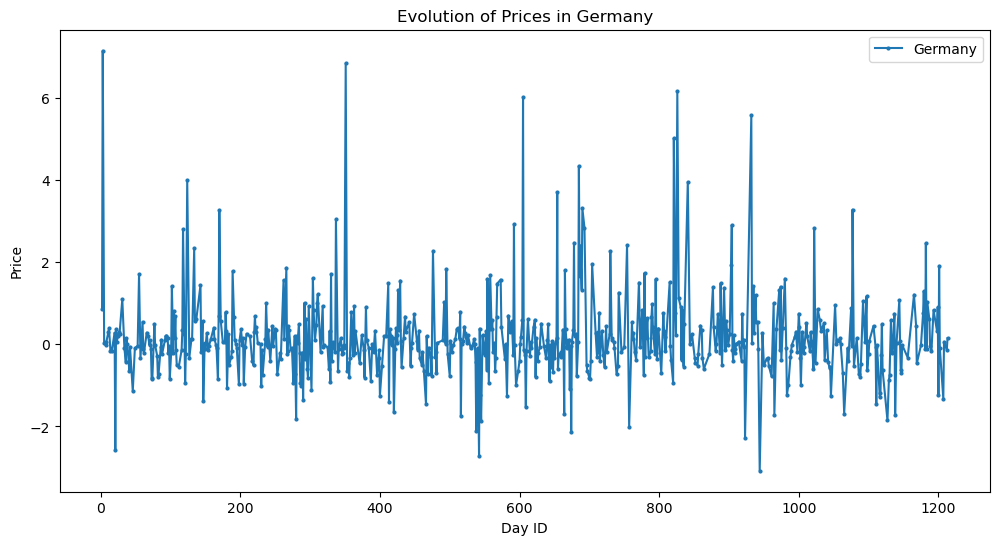

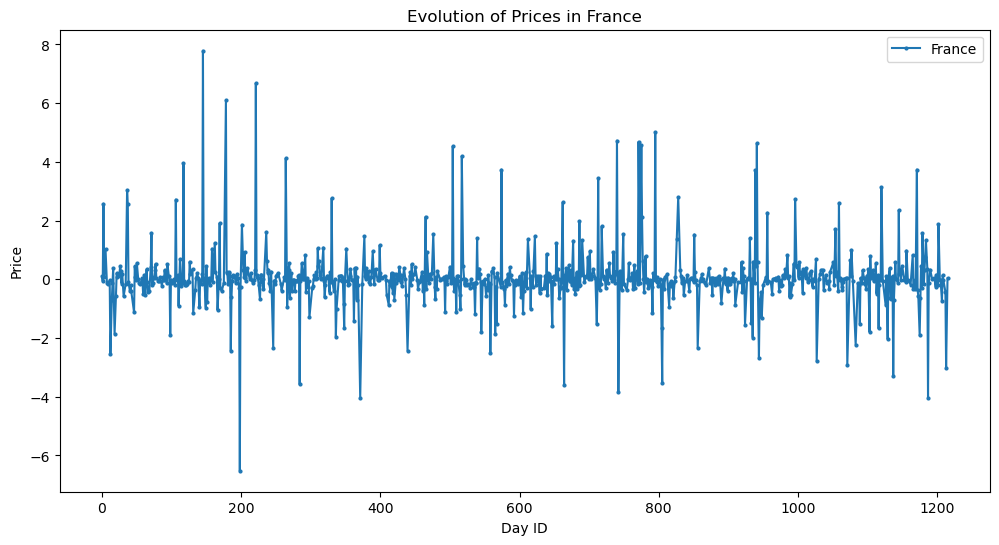

In [13]:
# Since the 'COUNTRY' column is represented as 'COUNTRY_DE' and 'COUNTRY_FR' in the x_train_imputed_new dataset,
# we will use these columns to filter the data for France and Germany.

# First, we need to merge x_train_imputed_new with y_train_new on 'DAY_ID' if it's a common column or on index if 'ID' is the index.
# It seems 'DAY_ID' is in x_train_imputed_new but not in y_train_new, so we'll use the indices assuming they match.

# Set 'ID' as index for y_train_new to prepare for merging
# y_train.set_index('ID', inplace=True)

# Merge the datasets
merged_data = x_train_imputed.join(y_train, how='inner')

# Now, plotting the evolution of prices for France and Germany based on 'COUNTRY_DE' and 'COUNTRY_FR' columns
# Since these columns are likely indicators (1 for presence, 0 for absence), we'll use them to filter the data.

# Filter for Germany (assuming 'COUNTRY_DE' == 1 indicates German data)
data_germany = merged_data[merged_data['COUNTRY_DE'] == 1]

# Filter for France (assuming 'COUNTRY_FR' == 1 indicates French data)
data_france = merged_data[merged_data['COUNTRY_FR'] == 1]

# Plot for Germany
plt.figure(figsize=(12, 6))
plt.plot(data_germany['DAY_ID'], data_germany['TARGET'], label='Germany', marker='o', linestyle='-', markersize=2)
plt.title('Evolution of Prices in Germany')
plt.xlabel('Day ID')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot for France
plt.figure(figsize=(12, 6))
plt.plot(data_france['DAY_ID'], data_france['TARGET'], label='France', marker='o', linestyle='-', markersize=2)
plt.title('Evolution of Prices in France')
plt.xlabel('Day ID')
plt.ylabel('Price')
plt.legend()
plt.show()
